In [1]:
import pandas as pd             #進行資料處理函式庫
import numpy as np              #高階大量的維度陣列與矩陣計算
import matplotlib.pyplot as plt #繪圖
import seaborn as sns           #繪圖
import io                       #負責處理資料 input/output
import requests                 #HTTP Request下載訓練資料用

In [2]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
s = requests.get(url).content
df_train = pd.read_csv(io.StringIO(s.decode("utf-8")))
#df_train = df_train.drop(labels=["sepal.length"],axis=1)    #移除sepal.length  axis= 1為行 0為列
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
lable_map = {"Setosa":0,"Versicolor":1,"Virginica":2}
#將編碼後的lable map存至df_train["variety"]中。
df_train["Class"] = df_train["variety"].map(lable_map)

lable_map
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety,Class
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [4]:
X = df_train.drop(labels=["variety","Class"],axis=1).values #移除 class,variety(因為字母不參與訓練)
#checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


### 切割訓練集與測試集

In [5]:
from sklearn.model_selection import train_test_split
X = df_train.drop(labels=["Class","variety"],axis=1)
y = df_train["Class"]
X_train , X_test ,y_train , y_test = train_test_split(X,y , test_size = .3 , random_state=42)

In [6]:
print("Training data shape : ",X_train.shape)
print("Testing data shape : ", X_test.shape)

Training data shape :  (105, 4)
Testing data shape :  (45, 4)


### PCA
Parameters:
1. n_components : 指定PCA降維後的特徵維度數目
2. whiten : 是否進行白化True/False。 白話意旨，對降維後的數據的每個特徵進行正規化，即讓方差都為1,平均值為0。默認值為False。
3. random_state : 亂數種子，設定常數能夠保證每次PCA結果都一樣

Attributes:
1. explained_variance_ : array類型。降維後的各主成分的方差值，主成分方差值越大，則說明這個主成分越重要
2. explained_varianc_ratio : array類型。降維後的各主成分的方差值占總方差值的比例，主成分所占比例越大，則說明這個主成分越重要
3. n_components_ : int類型。返回保留的特徵個數

Methods:
1. fit(X,y): 把數據放入模型中訓練模型
2. fit_transform(X,[y])all:訓練模型同時返回降維後的數據
3. transform(X) : 對於訓練好的數據降維

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2 , iterated_power=1)
train_reduced = pca.fit_transform(X_train)

print("PCA方差比 : ",pca.explained_variance_ratio_)
print("PCA方差值 : ",pca.explained_variance_)

PCA方差比 :  [0.9191876  0.05549301]
PCA方差值 :  [4.03024875 0.24331338]


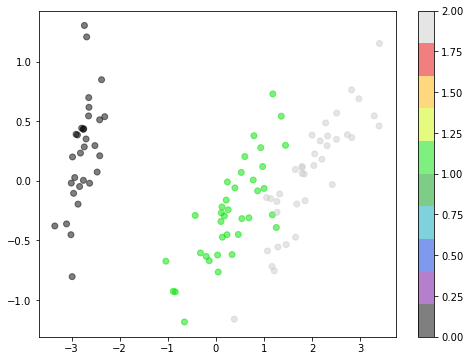

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0],train_reduced[:,1],c=y_train,alpha=0.5,cmap=plt.cm.get_cmap("nipy_spectral",10))

plt.colorbar()
plt.show()

In [23]:
y_train

81     1
133    2
137    2
75     1
109    2
      ..
71     1
106    2
14     0
92     1
102    2
Name: Class, Length: 105, dtype: int64

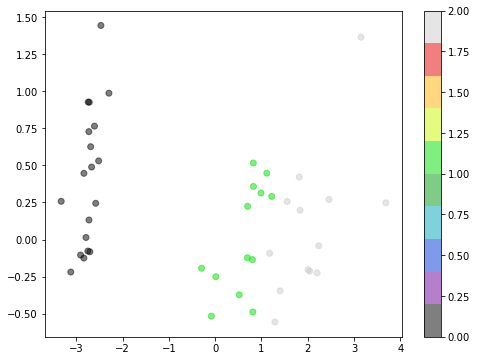

In [19]:
test_reduced = pca.transform(X_test)
plt.figure(figsize=(8,6))
plt.scatter(test_reduced[:,0],test_reduced[:,1], c=y_test , alpha=0.5 , cmap=plt.cm.get_cmap("nipy_spectral",10))

plt.colorbar()
plt.show()

#### KernelPCA
KernelPCA模型類似於非線性支持向量機，使用核技巧處理非線性數據的降維，主要是選擇合適的核函數。
#### IncrementalPCA
IncrementalPCA 模型主要是為了解決計算機內存限制問題。工業上樣本量和維度都是非常大的，如果直接擬合數據，機器性能一般都無法支撐。
IncrementalPCA則會將數據分成多個batch，然後對每個batch依次遞增調用partial_fit函數對樣本降維
#### SparsePCA
SparsePCA模型相較於普通的PCA區別在於使用了L1正規化，即對非主成分的影響降為0，避免了噪聲對降維的影響。
#### MiniBatchSparsePCA
MiniBatchSparsePCA模型類似於SparsePCA，不同之處在於MiniBatchSparsePCA模型通過使用一部分樣本特徵和給定的迭代次數進行降維，以此來解決特徵分解過慢的問題


### t-SNE
t-SNE使用了更複雜的公式來表達高維與低維之間的關係。且能夠允許非線性的轉換。

Parameters:
1. n_components : 指定t-SNE降維後的特徵維度數目 
2. n_iter : 設定迭代次數 
3. random_state : 亂數種子，設定常數能夠保證每次t-SNE結果都一樣

Attributes:
1. explained_variance_ : array類型。降維後的各主成分的方差值，主成分方差值越大，則說明這個主成分越重要
2. explained_varianc_ratio : array類型。降維後的各主成分的方差值占總方差值的比例，主成分所占比例越大，則說明這個主成分越重要
3. n_components_ : int類型。返回保留的特徵個數

Methods:
1. fit(X,y): 把數據放入模型中訓練模型
2. fit_transform(X):訓練模型同時返回降維後的數據
3. transform(X) : 對於訓練好的數據降維

In [21]:
from sklearn.manifold import TSNE
tsneModel = TSNE(n_components=2,random_state=42,n_iter=1000)
train_reduced = tsneModel.fit_transform(X_train)


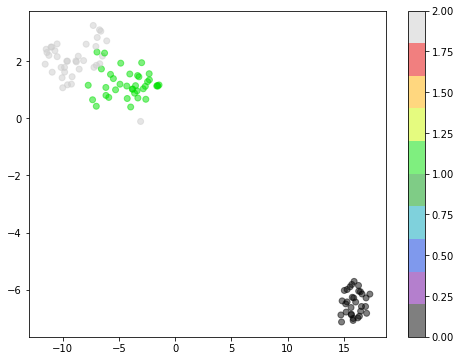

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0],train_reduced[:,1],c=y_train,alpha=0.5,
cmap=plt.cm.get_cmap("nipy_spectral",10))

plt.colorbar()
plt.show()

#### t-SNE 不適用於新資料
PCA降維可以適用新資料，可呼叫transform()函示即可。而t-SNE則不行。因為演算法的關係在scikit-learn套件中的t-SNE 演算法並沒有transform()函示可以呼叫